In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt


In [8]:
data = pd.read_csv("../data/Mobi_System_Data_2020.csv", compression='zip').dropna()
# data = data.loc[data["Departure postal code"].str.startswith("V6")]
print(data.columns)
data["time"] = pd.to_datetime(data["Departure"], format="%Y-%m-%d %H:%M:%S")
data["hour"] = data["time"].dt.hour
data["day"] = data["time"].dt.day
data["month"] = data["time"].dt.month
data["year"] = data["time"].dt.year

train_data = data[["year", "month", "day", "hour", "Departure lat", "Departure long"]]
features_departure = ["year", "month", "day", "hour", "Departure lat", "Departure long"]
train_data = data.groupby(features_departure).size().reset_index(name='counts')
x = train_data[features_departure]
y = train_data["counts"]




Index(['Unnamed: 0', 'Departure', 'Return', 'Bike', 'Departure station',
       'Return station', 'Membership type', 'Covered distance (m)',
       'Duration (sec.)', 'Departure battery voltage (mV)',
       'Return battery voltage (mV)', 'Departure temperature (C)',
       'Return temperature (C)', 'Stopover duration (sec.)',
       'Number of stopovers'],
      dtype='object')


In [ ]:
stations = data[["Departure lat", "Departure long", "Departure station"]].drop_duplicates()
predict_data_departure = pd.DataFrame(data={
    "year": [], 
    "month": [], 
    "day": [], 
    "hour": [], 
    "Departure lat": [],
    "Departure long": []})
for row in stations.iterrows():
    time = pd.date_range('2022-01-01', periods=8760, freq='H')

    station_data = pd.DataFrame(data={"time": time})
    station_data["hour"] = station_data["time"].dt.hour
    station_data["day"] = station_data["time"].dt.day
    station_data["month"] = station_data["time"].dt.month
    station_data["year"] = station_data["time"].dt.year
    station_data["Departure lat"] = row[1]["Departure lat"]
    station_data["Departure long"] = row[1]["Departure long"]
    station_data["Departure station"] = row[1]["Departure station"]
    station_data = station_data.drop(columns=["time"])
    
    predict_data_departure = pd.concat([predict_data_departure, station_data])
predict_data_departure[["year", "month", "day", "hour"]] = predict_data_departure[["year", "month", "day", "hour"]].astype(int)
    



In [ ]:
from xgboost import XGBRegressor
model_departure = XGBRegressor()
model_departure.fit(x, y)
predict_data_departure["counts"] = model_departure.predict(predict_data_departure[features_departure])
print(predict_data_departure)


      year  month  day  hour  Departure lat  Departure long  \
0     2022      1    1     0      49.285082     -123.134194   
1     2022      1    1     1      49.285082     -123.134194   
2     2022      1    1     2      49.285082     -123.134194   
3     2022      1    1     3      49.285082     -123.134194   
4     2022      1    1     4      49.285082     -123.134194   
...    ...    ...  ...   ...            ...             ...   
8755  2022     12   31    19      49.262866     -123.152425   
8756  2022     12   31    20      49.262866     -123.152425   
8757  2022     12   31    21      49.262866     -123.152425   
8758  2022     12   31    22      49.262866     -123.152425   
8759  2022     12   31    23      49.262866     -123.152425   

           Departure station    counts  
0     0048 Comox & Broughton  1.609205  
1     0048 Comox & Broughton  1.400793  
2     0048 Comox & Broughton  1.298717  
3     0048 Comox & Broughton  1.298717  
4     0048 Comox & Broughton  1.117224

<AxesSubplot:xlabel='hour'>

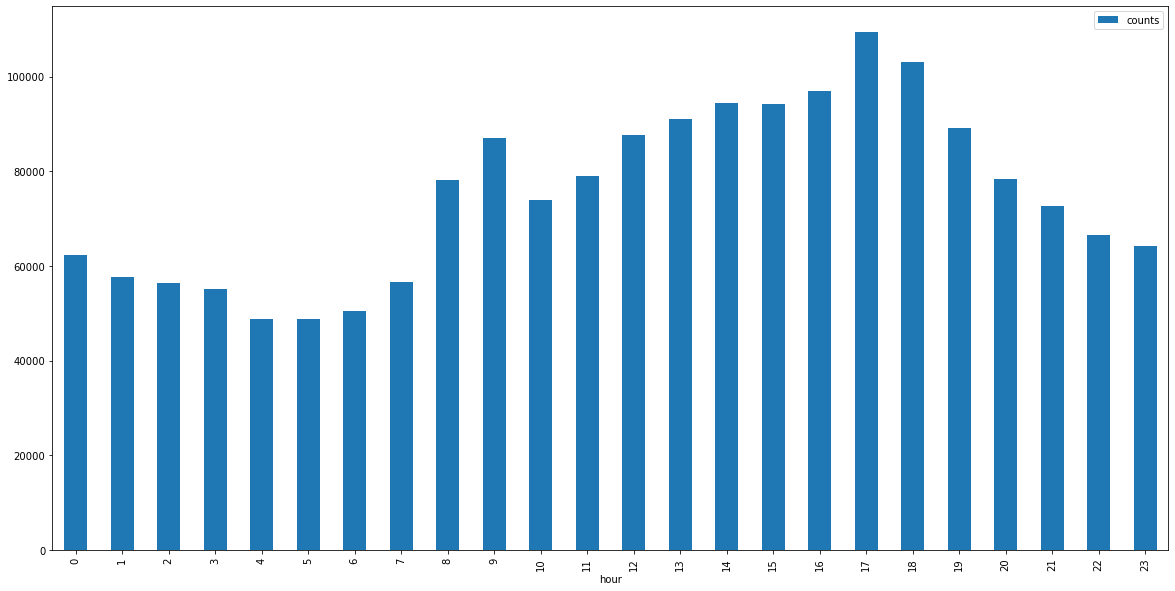

In [ ]:
hours = predict_data_departure[["hour", "counts"]].groupby("hour").sum()
# hours.plot.line(figsize=(20, 10)).set_ylabel("# of bikes");
hours.plot(kind='bar', figsize=(20, 10))
# print(hours)

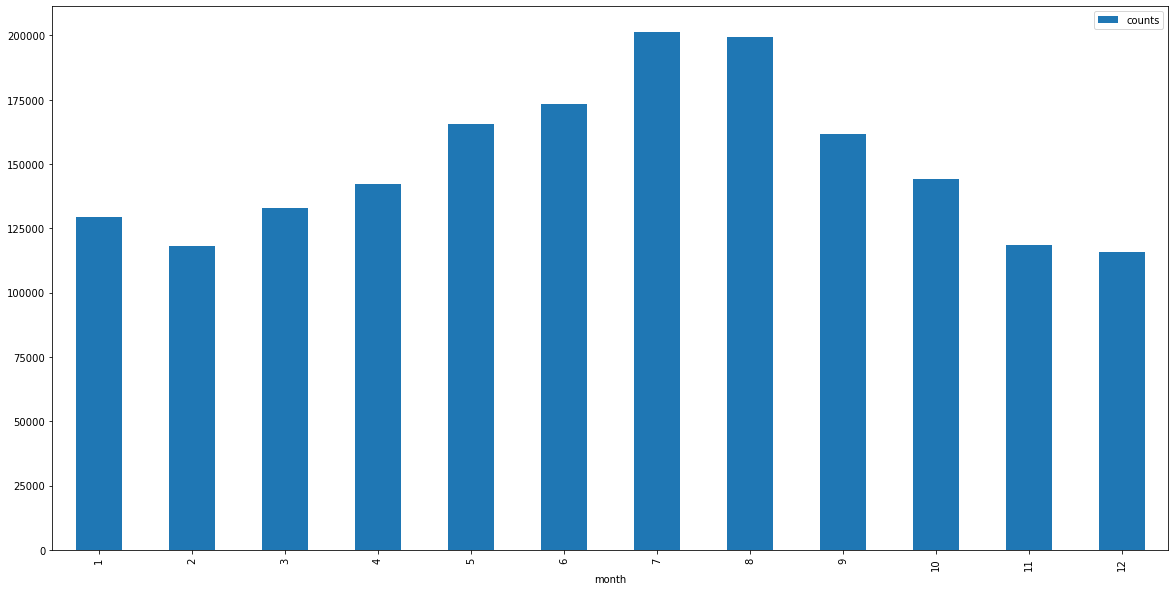

In [ ]:
month = predict_data_departure[["month", "counts"]].groupby("month").sum()
month.plot(kind='bar', figsize=(20, 10));

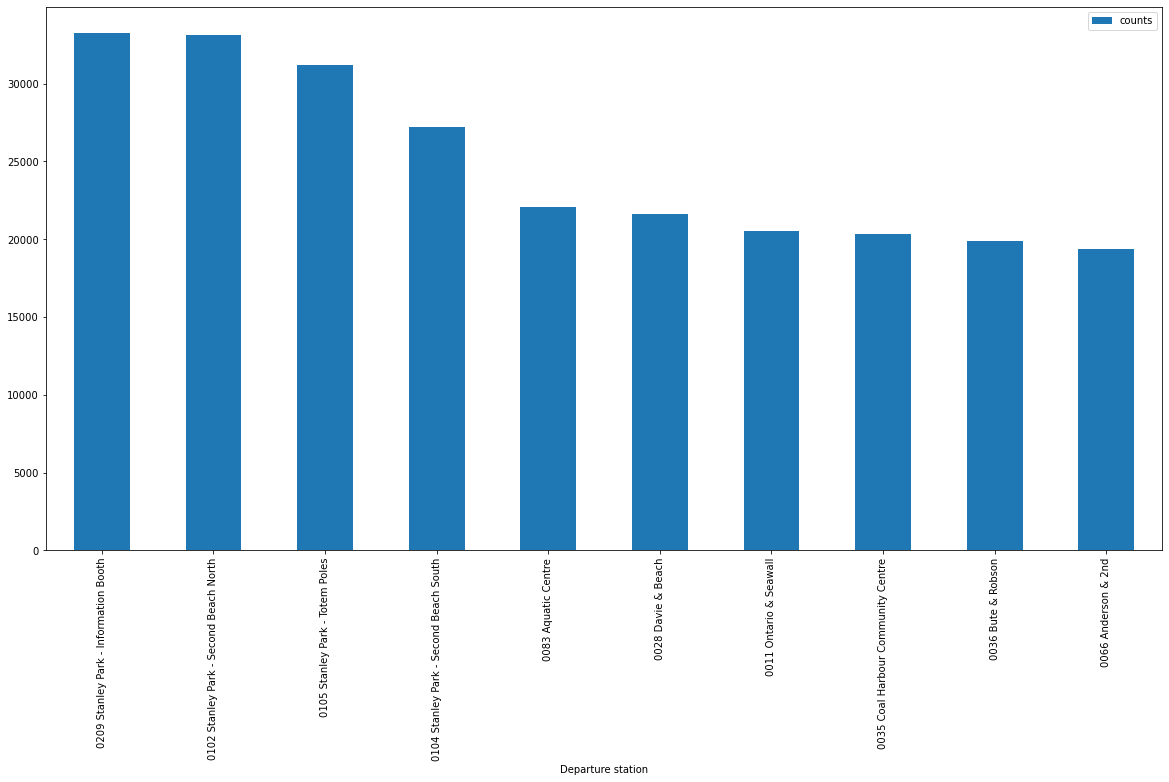

In [ ]:
stations = predict_data_departure[["Departure station", "counts"]].groupby("Departure station").sum()
stations.sort_values(by="counts", ascending= False).head(10).plot(kind='bar', figsize=(20, 10));

['0083 Aquatic Centre', '0028 Davie & Beach', '0011 Ontario & Seawall', '0035 Coal Harbour Community Centre', '0036 Bute & Robson', '0066 Anderson & 2nd', '0196 Drake & Hornby', '137-0188 Granville Island Public Market', '0187 Bute & Davie', '0005 Dunsmuir & Beatty']


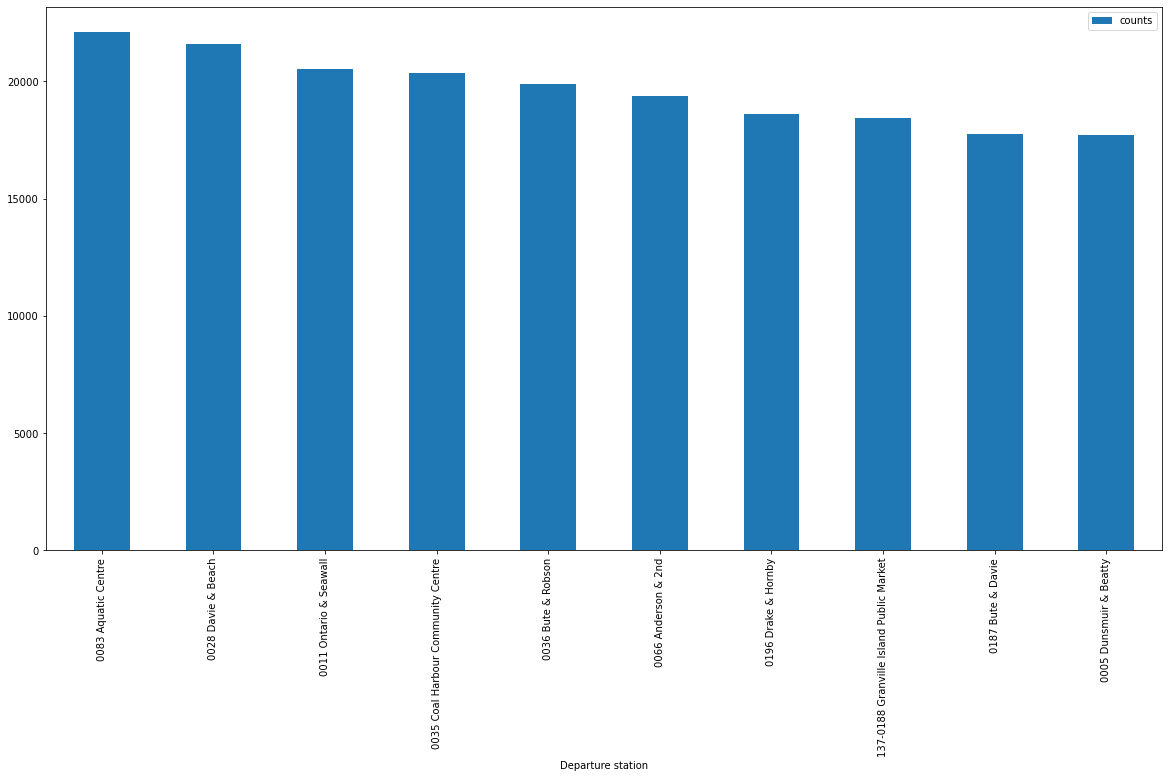

In [ ]:
stations = predict_data_departure.loc[
    ~predict_data_departure["Departure station"].str.contains("Stanley")
]
stations = stations[["Departure station", "counts"]].groupby("Departure station").sum()
stations = stations.sort_values(by="counts", ascending= False).head(10)
stations.plot(kind='bar', figsize=(20, 10));
top_10 = stations.index.to_list()
print(top_10)


<AxesSubplot:xlabel='hour'>

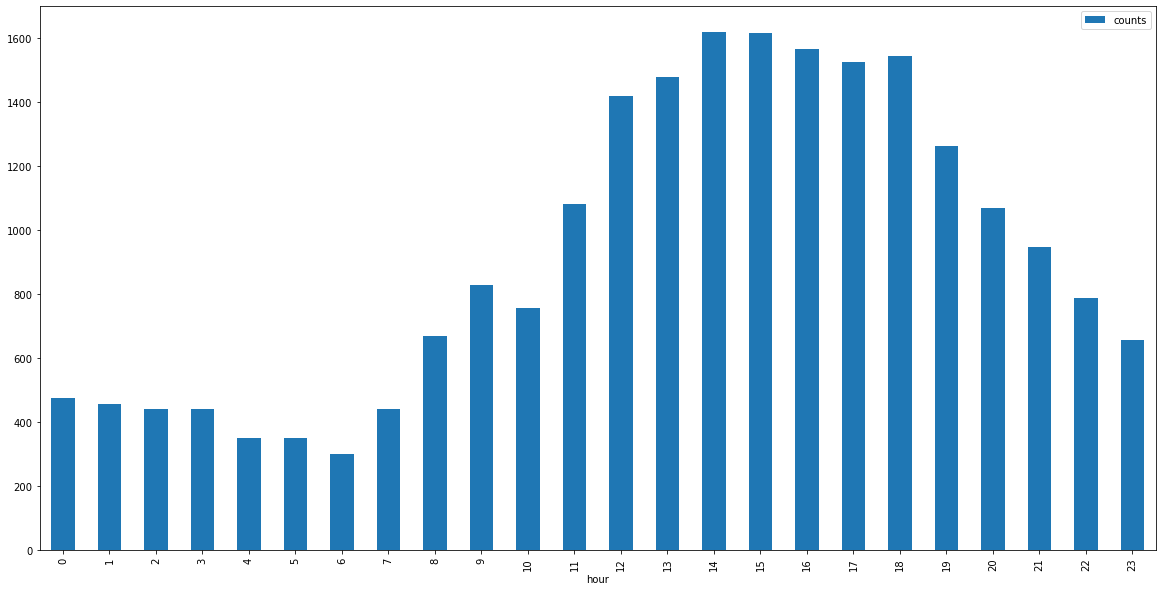

In [ ]:
specific_station = predict_data_departure.loc[predict_data_departure["Departure station"].str.contains(top_10[0])]
specific_station = specific_station[["hour", "counts"]].groupby("hour").sum()
specific_station.plot(kind='bar', figsize=(20, 10))

In [ ]:
features_return = ["year", "month", "day", "hour", "Return lat", "Return long"]
train_data = data.groupby(features_return).size().reset_index(name='counts')
x = train_data[features_return]
y = train_data["counts"]

stations = data[["Return lat", "Return long", "Return station"]].drop_duplicates()
print(stations)
predict_data_return = pd.DataFrame(data={
    "year": [], 
    "month": [], 
    "day": [], 
    "hour": [], 
    "Return lat": [],
    "Return long": []})
for row in stations.iterrows():
    time = pd.date_range('2022-01-01', periods=8760, freq='H')

    station_data = pd.DataFrame(data={"time": time})
    station_data["hour"] = station_data["time"].dt.hour
    station_data["day"] = station_data["time"].dt.day
    station_data["month"] = station_data["time"].dt.month
    station_data["year"] = station_data["time"].dt.year
    station_data["Return lat"] = row[1]["Return lat"]
    station_data["Return long"] = row[1]["Return long"]
    station_data["Return station"] = row[1]["Return station"]
    station_data = station_data.drop(columns=["time"])
    
    predict_data_return = pd.concat([predict_data_return, station_data])
predict_data_return[["year", "month", "day", "hour"]] = predict_data_return[["year", "month", "day", "hour"]].astype(int)

model_return = XGBRegressor()
model_return.fit(x, y)
predict_data_return["counts"] = model_return.predict(predict_data_return[features_return])
print(predict_data_return)

        Return lat  Return long                           Return station
0        49.285871  -123.121050                     0002 Burrard Station
1        49.285082  -123.134194                   0048 Comox & Broughton
2        49.290419  -123.125810       0035 Coal Harbour Community Centre
3        49.258819  -123.131317                        0211 14th & Alder
4        49.277844  -123.120942                   0079 Nelson & Richards
...            ...          ...                                      ...
5272     49.282283  -123.124670                    0051 Burrard & Smithe
87963    49.272701  -123.135215  137-0188 Granville Island Public Market
116793   49.276150  -123.098794            1000 Temporary Events Station
399370   49.034357  -118.445208                    76-0067 Cypress & 7th
489238   49.262866  -123.152425                   41-0075 10th & Arbutus

[132 rows x 3 columns]
      year  month  day  hour  Return lat  Return long          Return station  \
0     2022      1  

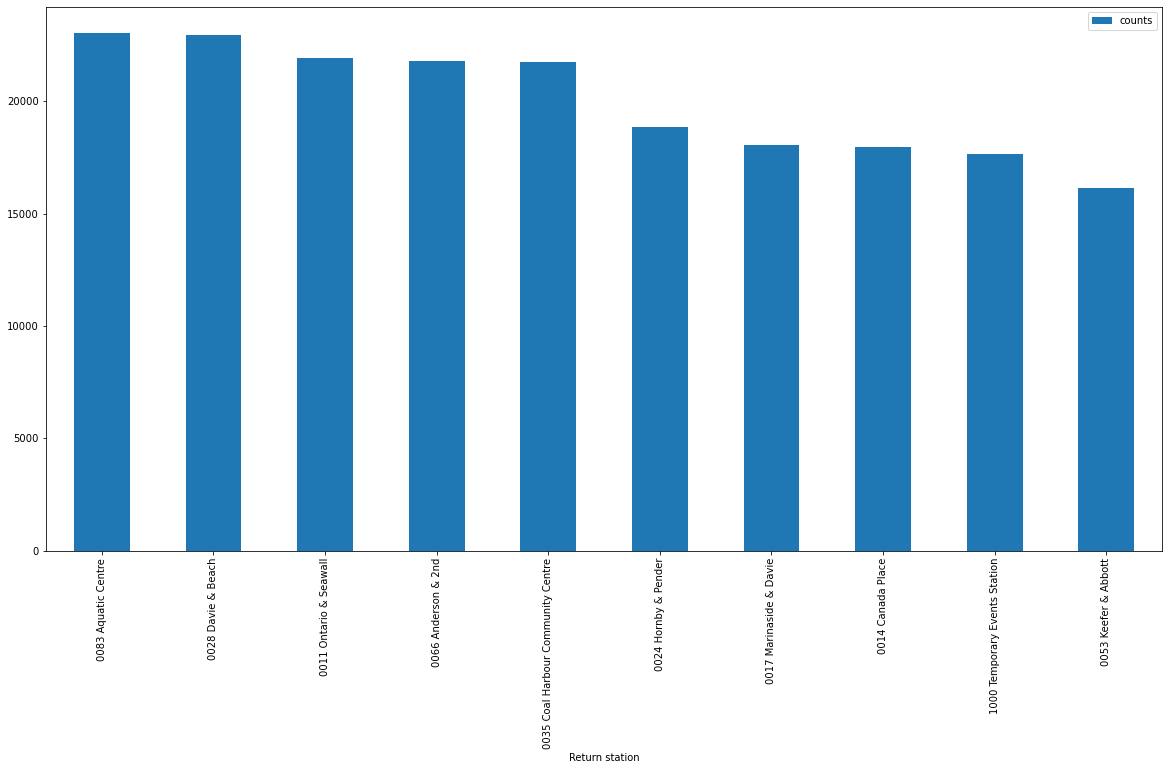

In [ ]:
specific_station_return = predict_data_return.loc[
    ~predict_data_return["Return station"].str.contains("Stanley")
]
stations_return = specific_station_return[["Return station", "counts"]].groupby("Return station").sum()
stations_return = stations_return.sort_values(by="counts", ascending= False).head(10)
stations_return.plot(kind='bar', figsize=(20, 10));
top_10 = stations_return.index.to_list()

<AxesSubplot:xlabel='hour'>

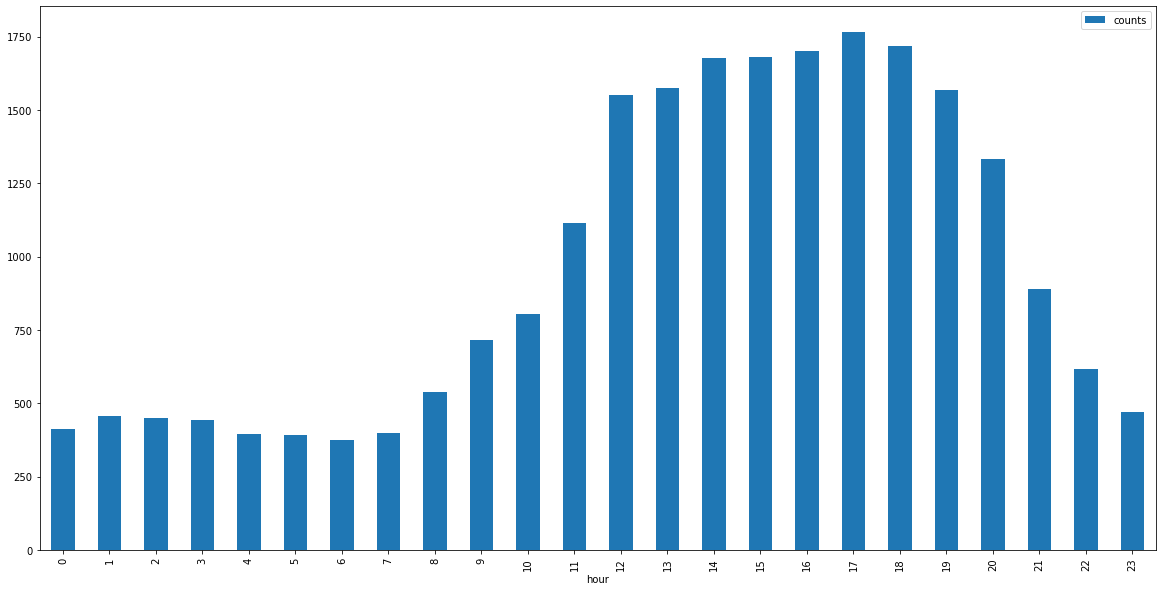

In [ ]:
specific_station = predict_data_return.loc[predict_data_return["Return station"].str.contains(top_10[0])]
specific_station = specific_station[["hour", "counts"]].groupby("hour").sum()
specific_station.plot(kind='bar', figsize=(20, 10))